# Part II -How trip duration is dependant on age and user type
## by DORIS B OMBONGI

## Investigation Overview

In this investigation, I wanted to look at the characteristics of bike trips that could be used to predict trip duration. The main focus was on age and user type.

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset consists of information regarding 183412 bike trips including trip durations in seconds, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude ,end station longitude, bike id, user type, member birth year, member gender and bike share for all trip columns containing each trip information. The dataset can be downloaded from 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.start_time = pd.to_datetime(df.start_time)

In [4]:
df.end_time = pd.to_datetime(df.end_time)

In [5]:
df['age']=2019-df['member_birth_year']

In [6]:
df['duration_min'] = df['duration_sec'] / 60

## Distribution of age.

Age in the fordgobike dataset take a range of values with the youngest being 18 years and the oldest being 141 years. Plotted on a histogram the age distribution shows that most bike riders were aged between 20 years and 40 years.

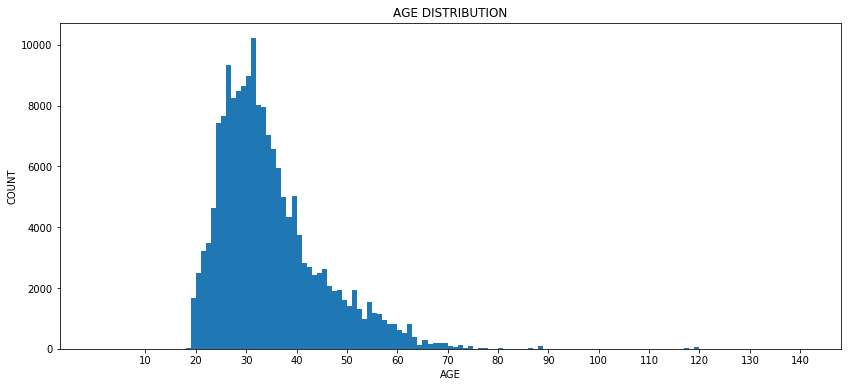

In [7]:
# Plotting age distribution
binsize = 1
bins = np.arange(0, df['age'].astype(float).max()+binsize, binsize)
plt.figure(figsize=[14,6])
plt.xticks(range(10, 150, 10))
plt.hist(data = df.dropna(), x = 'age', bins = bins)
plt.title('AGE DISTRIBUTION')
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

## Distribution of user type.



User type in the fordgobike dataset has two values customers and subscribers. Plotted on a pie chart it shows that there are more subcribers than the customers in the trip. Of all the bike riders 89% were subcribers where 11% were customers.

Text(0.5,1,'USER TYPE DISTRIBUTION')

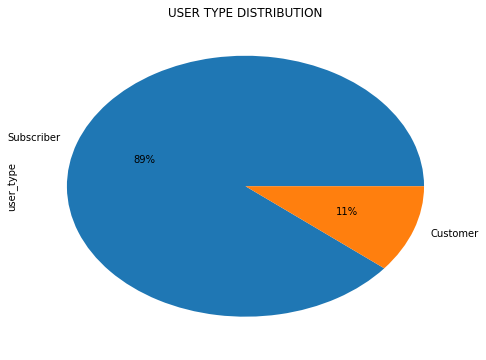

In [8]:
#create the percent function
def percent(value):
    percent=round(df[value].value_counts()/len(df)*100)
    return percent
#returns a pie chart with percentages
value=percent('user_type')
df['user_type'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6)) #%1.0f%% returns a percentage in a whole number without decimal points.
plt.title('USER TYPE DISTRIBUTION')

## Age vs Trip duration



Plotted on a scatter plot and hist2d plot next to each other, Most riders are aged between 20 years and 45 years and most younger riders have longer trips compared to older people.

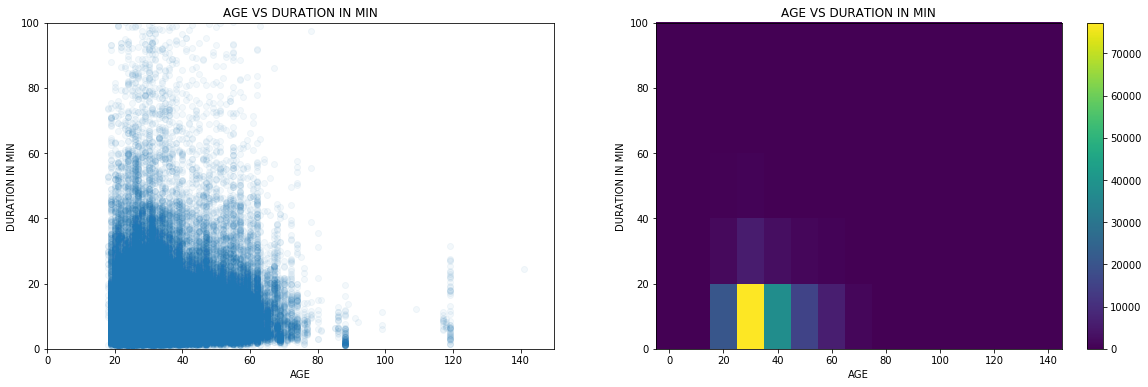

In [9]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.scatter(data=df,x='age',y='duration_min',alpha=1/20);
plt.axis([0, 150, 0, 100])
plt.xlabel('AGE')
plt.ylabel('DURATION IN MIN')
plt.title('AGE VS DURATION IN MIN')

plt.subplot(1,2,2)
bins_x = np.arange(-5, 145+1, 10)
bins_y = np.arange(0, 100+1, 20)
plt.hist2d((df['age']), df['duration_min'],bins = [bins_x, bins_y])
plt.colorbar();
plt.xlabel('AGE')
plt.ylabel('DURATION IN MIN')
plt.title('AGE VS DURATION IN MIN')
plt.show()

##  User type vs Trip duration

Plotted on a boxplots next to each other they show that Customers had longer trips compared to the subscribers.

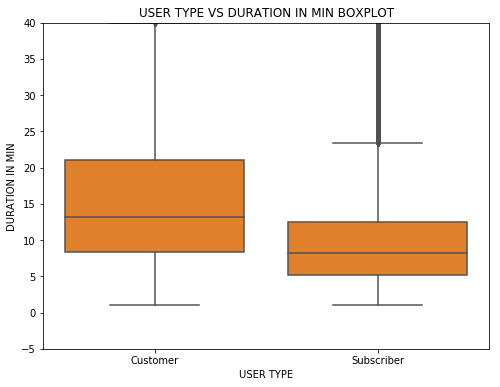

In [10]:
plt.figure(figsize = [8, 6])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim([-5, 40])
plt.xlabel('USER TYPE')
plt.ylabel('DURATION IN MIN')
plt.title('USER TYPE VS DURATION IN MIN BOXPLOT')
plt.show()

## Trip duration vs age and user type

Plotted on a FacetGrid, the two plots above show that the majority of the riders were younger people and younger riders both customers and subscribers have longer trips compared to older people.

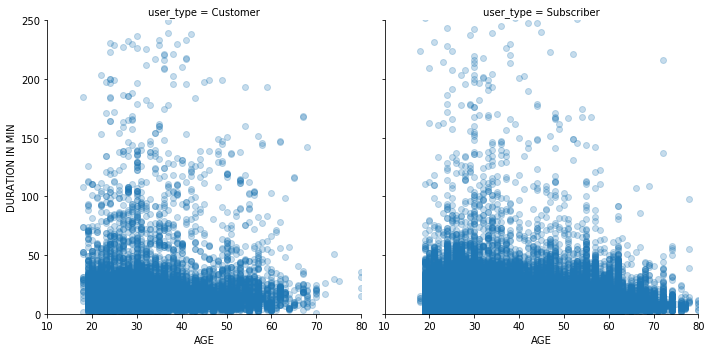

In [11]:
user_types = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,xlim = [10, 80], ylim = [0, 250])
user_types.map(plt.scatter, 'age', 'duration_min', alpha=0.25)
user_types.set_xlabels('AGE')
user_types.set_ylabels('DURATION IN MIN')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 563587 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/